In [1]:
# -*- coding: utf-8 -*-
"""
Netflix Clustering Project
"""

import pandas as pd
from sklearn.preprocessing import StandardScaler, MultiLabelBinarizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [3]:
# 1. import data
df = pd.read_csv("Netflix.csv")

In [5]:
# 2.Choose the features and subtract NaNs
df = df[['type', 'listed_in', 'duration']].dropna()
df

,type,listed_in,duration
0,TV Show,"International TV Shows, TV Dramas, TV Sci-Fi &...",4 Seasons
1,Movie,"Dramas, International Movies",93 min
2,Movie,"Horror Movies, International Movies",78 min
3,Movie,"Action & Adventure, Independent Movies, Sci-Fi...",80 min
4,Movie,Dramas,123 min
...,...,...,...
7782,Movie,"Dramas, International Movies",99 min
7783,Movie,"Dramas, International Movies, Music & Musicals",111 min
7784,Movie,"Documentaries, International Movies, Music & M...",44 min
7785,TV Show,"International TV Shows, Reality TV",1 Season


In [10]:
# 3.Seperate TV shows and Movies
df_movie = df[df['type'] == 'TV Show'].copy()
df_tv = df[df['type'] == 'Movie'].copy()

In [11]:
 # 4. Transform duration (feature) to complete integer
 df_tv['duration'] = df_tv['duration'].str.extract(r'(\d+)').astype(float) #we use regular expression
 #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
 # \d -> represents a digit (0-9)
 # +  -> at least 1 number
 # () -> capture group
 #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
 df_movie['duration'] = df_movie['duration'].str.extract(r'(\d+)').astype(float)

In [12]:
# 5. Clear genre (listed_in → a typical list)
df_tv['listed_in'] = df_tv['listed_in'].apply(lambda x: [i.strip() for i in x.split(',')])
df_movie['listed_in'] = df_movie['listed_in'].apply(lambda x: [i.strip() for i in x.split(',')])
# it helps to pass out variables to a dataframe

In [14]:
# 6. One-hot encoding of the  genres
mlb_tv = MultiLabelBinarizer()
mlb_movie = MultiLabelBinarizer()


genre_encoded_TV = pd.DataFrame(mlb_tv.fit_transform(df_tv['listed_in']), columns=mlb_tv.classes_)
genre_encoded_MOVIE = pd.DataFrame(mlb_movie.fit_transform(df_movie['listed_in']), columns=mlb_movie.classes_)

In [15]:
genre_encoded_TV

,Action & Adventure,Anime Features,Children & Family Movies,Classic Movies,Comedies,Cult Movies,Documentaries,Dramas,Faith & Spirituality,Horror Movies,Independent Movies,International Movies,LGBTQ Movies,Movies,Music & Musicals,Romantic Movies,Sci-Fi & Fantasy,Sports Movies,Stand-Up Comedy,Thrillers
0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5372,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5373,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
5374,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0
5375,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0


In [16]:
genre_encoded_MOVIE

,Anime Series,British TV Shows,Classic & Cult TV,Crime TV Shows,Docuseries,International TV Shows,Kids' TV,Korean TV Shows,Reality TV,Romantic TV Shows,...,Stand-Up Comedy & Talk Shows,TV Action & Adventure,TV Comedies,TV Dramas,TV Horror,TV Mysteries,TV Sci-Fi & Fantasy,TV Shows,TV Thrillers,Teen TV Shows
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
2,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2405,0,0,0,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2406,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2407,0,0,0,0,0,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2408,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [17]:
# 7. Reset index for merge
df_tv = df_tv.reset_index(drop=True)
df_movie = df_movie.reset_index(drop=True)
genre_encoded_TV = genre_encoded_TV.reset_index(drop=True)
genre_encoded_MOVIE = genre_encoded_MOVIE.reset_index(drop=True)

In [19]:
# 8. merge the features
X_tv = pd.concat([genre_encoded_TV, df_tv['duration']], axis=1).fillna(0)
X_movie = pd.concat([genre_encoded_MOVIE, df_movie['duration']], axis=1).fillna(0)

In [20]:
# 9. Normalization
scaler_tv = StandardScaler()
scaler_movie = StandardScaler()
X_tv_scaled = scaler_tv.fit_transform(X_tv)
X_movie_scaled = scaler_movie.fit_transform(X_movie)

In [21]:
# 10. K-Means clustering
k = 2
kmeans_tv = KMeans(n_clusters=k, random_state=42)
kmeans_movie = KMeans(n_clusters=k, random_state=42)
df_tv['cluster'] = kmeans_tv.fit_predict(X_tv_scaled)
df_movie['cluster'] = kmeans_movie.fit_predict(X_movie_scaled)

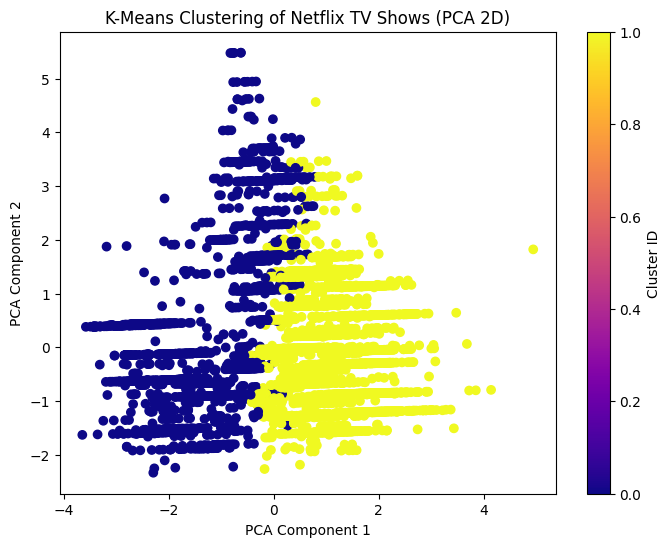

In [23]:
# 11. PCA for TV Shows
pca_tv = PCA(n_components=2)
X_tv_pca = pca_tv.fit_transform(X_tv_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_tv_pca[:, 0], X_tv_pca[:, 1], c=df_tv['cluster'], cmap='plasma')
plt.colorbar(label='Cluster ID')
plt.title('K-Means Clustering of Netflix TV Shows (PCA 2D)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


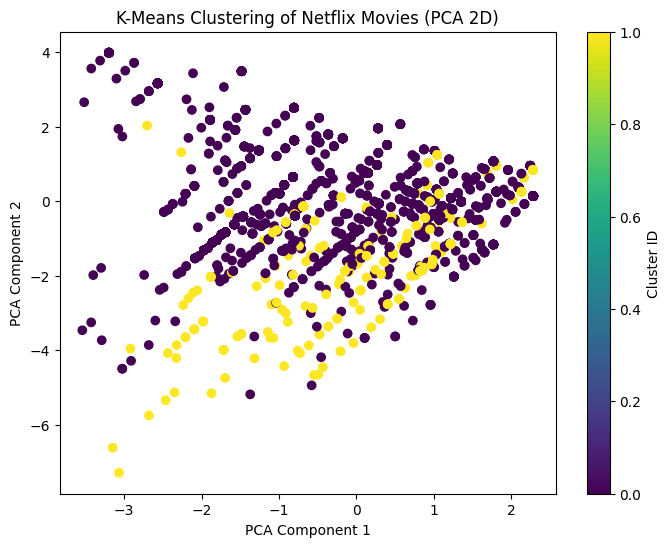

In [24]:
# 12. PCA for Movies
pca_movie = PCA(n_components=2)
X_movie_pca = pca_movie.fit_transform(X_movie_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_movie_pca[:, 0], X_movie_pca[:, 1], c=df_movie['cluster'], cmap='viridis')
plt.colorbar(label='Cluster ID')
plt.title('K-Means Clustering of Netflix Movies (PCA 2D)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [25]:
# 13. Analyze top genres per cluster (TV Shows)
top_genres_tv = (
    df_tv.explode('listed_in')
    .groupby('cluster')['listed_in']
    .value_counts()
    .groupby(level=0)
    .head(10)
)

print("Top Genres per TV Show Cluster:\n", top_genres_tv)

Top Genres per TV Show Cluster:
 cluster  listed_in               
0        Documentaries                783
         Children & Family Movies     494
         International Movies         435
         Comedies                     413
         Stand-Up Comedy              329
         Horror Movies                296
         Action & Adventure           273
         Thrillers                    173
         Music & Musicals             165
         Sci-Fi & Fantasy             158
1        Dramas                      2058
         International Movies        2002
         Comedies                    1058
         Independent Movies           607
         Romantic Movies              515
         Action & Adventure           448
         Thrillers                    318
         Music & Musicals             156
         Classic Movies                72
         Sports Movies                 69
Name: count, dtype: int64


In [26]:
top_genres_movies =(
    df_movie.explode('listed_in')
    .groupby('cluster')['listed_in']
    .value_counts()
    .groupby(level=0)
    .head(10)
)

print("Top Genres per TV Show Cluster:\n", top_genres_movies)

Top Genres per TV Show Cluster:
 cluster  listed_in             
0        International TV Shows    1005
         TV Dramas                  612
         TV Comedies                483
         Crime TV Shows             370
         Kids' TV                   368
         Docuseries                 351
         Romantic TV Shows          262
         British TV Shows           227
         Reality TV                 214
         Anime Series               147
1        International TV Shows     194
         Korean TV Shows            150
         TV Action & Adventure      150
         TV Dramas                   92
         TV Sci-Fi & Fantasy         76
         Romantic TV Shows           71
         Crime TV Shows              57
         Kids' TV                    46
         TV Comedies                 42
         TV Mysteries                16
Name: count, dtype: int64
